Priority Countries: Bangladesh, Ghana, Liberia, Mali, and Sierra Leone

Evaluated the admin fields in the hierarchy spreadsheet for Sierra Leone. An edited version was created that rid of word fragments in the raw shapefile such as: 'CHPS' 

-read in GADM shapefile

-read in hierarchy spreadsheet

In [484]:
import os, sys
import geopandas as gpd
import pandas as pd
from geopy.geocoders import GeoNames, Nominatim
from shapely.geometry import Point

In [485]:
from geopy.geocoders import GoogleV3
geolocator = GoogleV3(api_key='insert here')

In [486]:
iso3 = 'GHA'

In [487]:
input_dir = "/home/public/Data/PROJECTS/Health" #
out_folder = os.path.join(input_dir, "output", iso3)
# out_folder = r"C:\repos\health-equity-access\notebooks\output"
if not os.path.exists(out_folder):
    os.mkdir(out_folder)

## imported edited master table

In [488]:
master_table = pd.read_csv(os.path.join(input_dir, "tom_formatted", "hierarchy", "tom_edited_ghana_collapsed.csv"), encoding='latin-1')

In [489]:
master_table

,orgunitlevel1,orgunitlevel2,orgunitlevel3,orgunitlevel4,orgunitlevel5
0,Eastern,Abuakwa North,Kukurantumi,Esther Twum Maternity Home,Esther Twum Maternity Home
1,Eastern,Abuakwa North,Kukurantumi,Kukurantumi Apotosu,Kukurantumi Apotosu
2,Eastern,Abuakwa North,Kukurantumi,Kukurantumi,Kukurantumi
3,Eastern,Abuakwa North,Kukurantumi,Sokode Juaso,Sokode Juaso
4,Eastern,Abuakwa North,Kukurantumi,The Community Hospital (Kukurantumi),The Community Hospital (Kukurantumi)
...,...,...,...,...,...
10559,Ghana,Western North,Suaman,Karlo,Karlo
10560,Ghana,Western North,Suaman,Karlo,Kwabenakrom
10561,Ghana,Western North,Suaman,Karlo,Sui-Ano
10562,Ghana,Western North,Suaman,Kwasuo,Kwassuo


### inspect the counts of unique admin units

In [490]:
len(master_table.orgunitlevel2.unique())

49

In [491]:
len(master_table.orgunitlevel3.unique())

482

In [492]:
len(master_table.orgunitlevel4.unique())

2487

In [493]:
len(master_table.orgunitlevel5.unique())

9060

In [494]:
country_poly = gpd.read_file(os.path.join(input_dir, "gadm", "GHA", "gadm36_GHA_0.shp"))

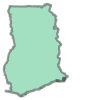

In [495]:
country_poly.geometry[0]

## Import GADM admin file

In [496]:
gadm_table = gpd.read_file(os.path.join(input_dir, "gadm", "GHA", "gadm36_GHA_2.shp"))

In [497]:
gadm_table

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,GHA,Ghana,GHA.1_1,Ashanti,None,GHA.1.1_1,Adansi North,None,None,District,District,None,None,"POLYGON ((-1.41637 6.32333, -1.43242 6.30784, ..."
1,GHA,Ghana,GHA.1_1,Ashanti,None,GHA.1.2_1,Adansi South,None,None,District,District,None,None,"POLYGON ((-1.54145 5.93492, -1.53550 5.94214, ..."
2,GHA,Ghana,GHA.1_1,Ashanti,None,GHA.1.3_1,Afigya Sekyere,Afigya Kwabre,None,District,District,None,GH.AH.AF,"POLYGON ((-1.41025 6.86558, -1.42795 6.86314, ..."
3,GHA,Ghana,GHA.1_1,Ashanti,None,GHA.1.4_1,Ahafo Ano North,None,None,District,District,None,GH.AH.AN,"POLYGON ((-2.29597 6.71882, -2.29462 6.72683, ..."
4,GHA,Ghana,GHA.1_1,Ashanti,None,GHA.1.5_1,Ahafo Ano South,None,None,District,District,None,GH.AH.AS,"POLYGON ((-1.81879 6.98329, -1.83513 6.96345, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,GHA,Ghana,GHA.10_1,Western,None,GHA.10.9_1,Sefwi Wiawso,Sefei Wiaso|Sefwi Wiaso,None,District,District,None,GH.WP.SW,"POLYGON ((-2.36110 6.08630, -2.36740 6.07603, ..."
133,GHA,Ghana,GHA.10_1,Western,None,GHA.10.10_1,Shama Ahanta East,Shama Ahanta East Metropolitan Assembly,None,Metropolitan District,Metropolitan District,None,GH.WP.SA,"MULTIPOLYGON (((-1.70347 4.94569, -1.70347 4.9..."
134,GHA,Ghana,GHA.10_1,Western,None,GHA.10.11_1,Wasa Amenfi East,None,None,District,District,None,None,"POLYGON ((-1.82511 5.57554, -1.82662 5.57551, ..."
135,GHA,Ghana,GHA.10_1,Western,None,GHA.10.12_1,Wasa Amenfi West,Wasa West,None,District,District,None,None,"POLYGON ((-2.59935 5.44091, -2.59728 5.44642, ..."


### inspect the counts of unique admin units

In [498]:
len(gadm_table.NAME_2.unique())

137

In [499]:
len(gadm_table.NAME_1.unique())

10

### Match master health list admin names to GADM admin names. Use fuzzy matching to get more matches.

In [500]:
!{sys.executable} -m pip install thefuzz[speedup]

Defaulting to user installation because normal site-packages is not writeable
distutils: /home/wb411133/.local/include/python3.7m/UNKNOWN
sysconfig: /home/wb411133/.local/include/python3.7/UNKNOWN
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/home/wb447340/.conda/envs/templateA/bin/python -m pip install --upgrade pip' command.


In [501]:
from thefuzz import fuzz
from thefuzz import process

In [502]:
# test
fuzz.ratio("this is a test", "this is a test!")

97

In [503]:
## https://www.geeksforgeeks.org/how-to-do-fuzzy-matching-on-pandas-dataframe-column-using-python/

In [504]:
def match_name(name, list_names, min_score=0):
    # -1 score incase we don't get any matches
    max_score = -1
    # Returning empty name for no match as well
    max_name = ""
    # Iterating over all names in the other
    for name2 in list_names:
        #Finding fuzzy match score
        score = fuzz.ratio(name, name2)
        # Checking if we are above our threshold and have a better score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)

### Matching master_table orgunitlevel3 names to gadm_table NAME_2 names
This matching will just be used for statistics purposes. As we will see the percentage of GADM admin areas that have a match in the master table

In [505]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating over our players without salaries found above
for name in gadm_table.NAME_2:

    #print('print name')
    #print(name)

    # Use our method to find best match, we can set a threshold here
    match = match_name(name, master_table.orgunitlevel3, 75)

    # New dict for storing data
    dict_ = {}
    dict_.update({"name_2" : name})
    dict_.update({"match_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)

merge_table = pd.DataFrame(dict_list)
# Display results
merge_table

merge_table2 = merge_table[merge_table.score > 80]
merge_table2

,name_2,match_name,score
0,Adansi North,Adansi North,100
1,Adansi South,Adansi South,100
3,Ahafo Ano North,Ahafo Ano North,100
4,Ahafo Ano South,Ahafo Ano North,87
5,Amansie Central,Amansie Central,100
...,...,...,...
131,Nzema East,Nzema East,100
132,Sefwi Wiawso,Sefwi-Wiawso,92
134,Wasa Amenfi East,Wassa Amenfi East,97
135,Wasa Amenfi West,Wassa Amenfi West,97


In [506]:
425 / len(gadm_table.NAME_2.unique())
# 60 percent of admin 4s are able to be matched

3.102189781021898

### Matching gadm_table NAME_2 names to unique master_table orgunitlevel3 names
By counting the number of unique admin units in both admin files, these admin units have the most similar counts of admin units, and are likely to result in the greatest percentage of matches.

By doing these matches we will be able to join the GADM polygon shape to the correct rows in the master table.

In [507]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating over our players without salaries found above
for name in master_table.orgunitlevel3.unique():

    #print('print name')
    #print(name)

    # Use our method to find best match, we can set a threshold here
    match = match_name(name, gadm_table.NAME_2, 75)

    # New dict for storing data
    dict_ = {}
    dict_.update({"name_2" : name})
    dict_.update({"match_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)

merge_table = pd.DataFrame(dict_list)
# Display results
merge_table

merge_table2 = merge_table[merge_table.score > 80]
merge_table2

,name_2,match_name,score
135,Nkwatia,Nkwanta,86
224,Asunafo North,Asunafo North,100
225,Asunafo South,Asunafo South,100
228,Tano North,Tano North,100
229,Tano South,Tano South,100
...,...,...,...
471,Wassa Amenfi West,Wasa Amenfi West,97
472,Wassa East,Wa East,82
476,Bibiani-Anhwiaso-Bekwai,Bibiani Anhwiaso Bekwai,91
478,Juaboso,Juabeso,86


In [508]:
# percentage of rows in the master table that have matched admin polygons
501/ len(master_table.orgunitlevel3.unique())

1.0394190871369295

In [509]:
# now for the master table, loop through each match name, and replace with Name3(from gdam),

In [510]:
master_table_copy = master_table.copy()

In [511]:
master_table_copy['geocoding_method'] = "None"
master_table_copy['district'] = "None"

In [512]:
for idx, row in merge_table2.iterrows():
    print(row.name_2)
    #print(master_table_copy.loc[master_table_copy["orgunitlevel4"] == row.match_name])
    master_table_copy.loc[master_table_copy["orgunitlevel3"] == row.match_name,'district'] = row.name_2

Nkwatia
Asunafo North
Asunafo South
Tano North
Tano South
Adansi North
Adansi South
Ahafo Ano North
Ahafo Ano South East
Ahafo Ano South West
Amansie Central
Amansie South
Amansie West
Asante Akim North
Asante Akim South
Atwima Mponua
Ejura-Sekyedumase
Kumasi
Offinso
Sekyere East
Berekum
Jaman North
Jaman South
Tain
Atebubu-Amanten
Kintampo North
Kintampo South
Pru
Abura-Asebu-Kwamankese
Ajumako-Enyan-Essiam
Asikuma-Odoben-Brakwa
Assin North
Assin South
Cape Coast
Gomoa East
Gomoa West
Komenda-Edna-Eguafo-Abirem
Mfantsiman
Upper Denkyira East
Upper Denkyira West
Akwapim North
Akwapim South
Asuogyaman
Birim North
Birim South
Kwaebibirem
Kwahu South
Kwahu West
West Akim
Yilo-Krobo
Ga East
Ga West
Tema
East Mamprusi
West Mamprusi
Gushiegu
Karaga
Nanumba North
Nanumba South
Tamale
Yendi
Jasikan
Kadjebi
Krachi East
Krachi West
Bole
Central Gonja
East Gonja
Sawla-Tuna-Kalba
West Gonja
Bawku Municipal
Bawku West
Bongo
Kasena-Nankana
Lawra
Sissala East
Sissala West
Wa East
Wa Municipal
Wa West

## Import Health Sites from HealthSites.io
Health sites come in both a node and a way shapefile. You need to import both to get all the sites.

In QGIS, I created centroids from the ways then merged it with the points.

In [513]:
nodes_io = gpd.read_file(os.path.join(input_dir, "healthsitesio", "GHA", "merged_GHA_healthsites.shp"))

In [514]:
nodes_io.head()

,osm_id,amenity,healthcare,name,operator,source,speciality,operator_t,contact_nu,operationa,...,addr_stree,addr_postc,addr_city,changeset_,changese_1,changese_2,changese_3,layer,path,geometry
0,1590950161,pharmacy,None,Pro-Life Pharmacy,None,None,None,None,None,None,...,None,None,None,10399175,1,2012-01-15 15:29:13+00:00,GO_OSM,Ghana-node,C:/Users/wb546254/Downloads/Ghana/Ghana-node.shp,POINT (-0.11987 5.60103)
1,1700719794,dentist,dentist,Beaver Clinic,None,None,None,private,0302 771 785,None,...,Agostino Neto Road,None,Accra,123738868,4,2022-07-18 01:41:48+00:00,Johnwhelan,Ghana-node,C:/Users/wb546254/Downloads/Ghana/Ghana-node.shp,POINT (-0.17892 5.60570)
2,1700719799,dentist,None,Bethel Dental Clinic,None,None,None,None,None,None,...,None,None,None,11174216,1,2012-04-04 09:43:15+00:00,GO_OSM,Ghana-node,C:/Users/wb546254/Downloads/Ghana/Ghana-node.shp,POINT (-0.19254 5.61680)
3,1728032224,clinic,clinic;doctor,Adabraka clinic,None,None,None,private,0302 222 6430,None,...,Farrar Avenue,None,"Castle Road,Accra",85032008,2,2020-05-11 14:58:14+00:00,Andy Sekoh,Ghana-node,C:/Users/wb546254/Downloads/Ghana/Ghana-node.shp,POINT (-0.20960 5.56627)
4,1728032244,dentist,None,New world dental clinic,None,None,None,None,None,None,...,None,None,None,11396502,1,2012-04-23 15:37:16+00:00,GO_OSM,Ghana-node,C:/Users/wb546254/Downloads/Ghana/Ghana-node.shp,POINT (-0.20206 5.56899)


In [515]:
# Improve by making all names lower-case, and getting rid of common words such as 'clinic'

In [516]:
nodes_io['name'] = nodes_io['name'].str.lower()

In [517]:
for idx, row in nodes_io.iterrows():
    #if not NoneType
    if row['name']:
        if "community" in row['name']:
            nodes_io.loc[idx, "name"] = row['name'].replace("community", "")
        if "clinic" in row['name']:
            nodes_io.loc[idx, "name"] = row['name'].replace("clinic", "")
        if "centre" in row['name']:
            nodes_io.loc[idx, "name"] = row['name'].replace("centre", "")
        if "center" in row['name']:
            nodes_io.loc[idx, "name"] = row['name'].replace("center", "")
        if "hospital" in row['name']:
            nodes_io.loc[idx, "name"] = row['name'].replace("hospital", "")

In [518]:
# do the same for the master table

missing_functional_records = master_table_copy.copy()
missing_functional_records['NAME'] = master_table_copy['orgunitlevel5'].str.lower()

for idx, row in missing_functional_records.iterrows():
    #if not NoneType
    if row['NAME']:
        if "community" in row['NAME']:
            missing_functional_records.loc[idx, "NAME"] = row['NAME'].replace("community", "")
        if "clinic" in row['NAME']:
            missing_functional_records.loc[idx, "NAME"] = row['NAME'].replace("clinic", "")
        if "centre" in row['NAME']:
            missing_functional_records.loc[idx, "NAME"] = row['NAME'].replace("centre", "")
        if "center" in row['NAME']:
            missing_functional_records.loc[idx, "NAME"] = row['NAME'].replace("center", "")
        if "hospital" in row['NAME']:
            missing_functional_records.loc[idx, "NAME"] = row['NAME'].replace("hospital", "")

In [519]:
for idx, row in missing_functional_records.iterrows():
#     print(f"Geocoding {idx}, {i} of {len(lbr_missing)}")
    #print(row.NAME)
    # Check if there ia another entry with location
    
    copied_matching_row = nodes_io.loc[nodes_io['name']==row.NAME,['geometry']]
    if len(copied_matching_row) > 0:
        print('a result')
        print(copied_matching_row)
        res = copied_matching_row.iloc[0]
        missing_functional_records.loc[idx, "longitude"] = res.geometry.x
        missing_functional_records.loc[idx, "latitude"] = res.geometry.y
        print("\tSuccess for Another facility with same Location")
        missing_functional_records.loc[idx, "geocoding_method"] = "Location from Health Sites IO"

a result
                      geometry
1072  POINT (-0.36604 6.23082)
	Success for Another facility with same Location
a result
                      geometry
1508  POINT (-0.55505 6.16689)
	Success for Another facility with same Location
a result
                      geometry
1708  POINT (-1.00119 5.84477)
	Success for Another facility with same Location
a result
                      geometry
1525  POINT (-0.65388 6.47592)
	Success for Another facility with same Location
a result
                     geometry
1546  POINT (0.03234 7.05273)
	Success for Another facility with same Location
a result
                      geometry
1530  POINT (-0.75275 6.53503)
	Success for Another facility with same Location
a result
                      geometry
1610  POINT (-0.76729 6.53828)
	Success for Another facility with same Location
a result
                     geometry
1259  POINT (0.12496 6.09788)
	Success for Another facility with same Location
a result
                      geometry
1549

a result
                      geometry
1138  POINT (-1.19372 5.14160)
	Success for Another facility with same Location
a result
                      geometry
1620  POINT (-0.15226 5.63229)
	Success for Another facility with same Location
a result
                      geometry
1346  POINT (-2.72688 5.02243)
	Success for Another facility with same Location
a result
                     geometry
722  POINT (-0.42906 5.53320)
	Success for Another facility with same Location
a result
                      geometry
1556  POINT (-0.01935 5.67209)
	Success for Another facility with same Location
a result
                     geometry
722  POINT (-0.42906 5.53320)
	Success for Another facility with same Location
a result
                     geometry
313  POINT (-1.27278 5.13118)
	Success for Another facility with same Location
a result
                      geometry
1499  POINT (-1.26621 5.13402)
	Success for Another facility with same Location
a result
                     geometry
509  PO

a result
                     geometry
951  POINT (-0.22835 5.64828)
	Success for Another facility with same Location
a result
                      geometry
1614  POINT (-0.23156 5.66861)
	Success for Another facility with same Location
a result
                      geometry
1418  POINT (-0.20303 5.67740)
	Success for Another facility with same Location
a result
                     geometry
488  POINT (-0.26093 5.63063)
	Success for Another facility with same Location
a result
                     geometry
985  POINT (-0.32616 5.54631)
	Success for Another facility with same Location
a result
                     geometry
424  POINT (-0.33501 5.54295)
	Success for Another facility with same Location
a result
                      geometry
1361  POINT (-0.29938 5.70191)
	Success for Another facility with same Location
a result
                     geometry
400  POINT (-0.35948 5.73637)
	Success for Another facility with same Location
a result
                      geometry
1504  POIN

a result
                     geometry
109  POINT (-0.03998 5.68688)
	Success for Another facility with same Location
a result
                     geometry
1522  POINT (0.31392 8.49595)
	Success for Another facility with same Location
a result
                      geometry
1570  POINT (-2.49714 9.02917)
	Success for Another facility with same Location
a result
                      geometry
1365  POINT (-1.00465 9.26453)
	Success for Another facility with same Location
a result
                       geometry
1463  POINT (-0.85588 10.80673)
	Success for Another facility with same Location
a result
                      geometry
1733  POINT (-1.50955 9.16491)
	Success for Another facility with same Location
a result
                     geometry
906  POINT (-1.85685 9.21388)
	Success for Another facility with same Location
a result
                       geometry
1440  POINT (-0.79390 10.79149)
	Success for Another facility with same Location
a result
                       geometry
1

a result
                      geometry
1417  POINT (-2.30186 6.45665)
	Success for Another facility with same Location
a result
                      geometry
1416  POINT (-2.31687 6.45526)
	Success for Another facility with same Location
a result
                     geometry
190  POINT (-2.31929 6.27281)
	Success for Another facility with same Location


In [520]:
missing_functional_records.geocoding_method.value_counts()

None                             10290
Location from Health Sites IO      274
Name: geocoding_method, dtype: int64

In [521]:
missing_functional_records.district.value_counts()

None             7840
Kumasi            133
Ga East            71
Bongo              66
Sissala East       64
                 ... 
Pru                24
Akatsi North       22
Nanumba North      20
Tano South         20
Birim South        15
Name: district, Length: 71, dtype: int64

In [522]:
missing_functional_records

,orgunitlevel1,orgunitlevel2,orgunitlevel3,orgunitlevel4,orgunitlevel5,geocoding_method,district,NAME,longitude,latitude
0,Eastern,Abuakwa North,Kukurantumi,Esther Twum Maternity Home,Esther Twum Maternity Home,None,None,esther twum maternity home,NaN,NaN
1,Eastern,Abuakwa North,Kukurantumi,Kukurantumi Apotosu,Kukurantumi Apotosu,None,None,kukurantumi apotosu,NaN,NaN
2,Eastern,Abuakwa North,Kukurantumi,Kukurantumi,Kukurantumi,None,None,kukurantumi,NaN,NaN
3,Eastern,Abuakwa North,Kukurantumi,Sokode Juaso,Sokode Juaso,None,None,sokode juaso,NaN,NaN
4,Eastern,Abuakwa North,Kukurantumi,The Community Hospital (Kukurantumi),The Community Hospital (Kukurantumi),None,None,the (kukurantumi),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10559,Ghana,Western North,Suaman,Karlo,Karlo,None,None,karlo,NaN,NaN
10560,Ghana,Western North,Suaman,Karlo,Kwabenakrom,None,None,kwabenakrom,NaN,NaN
10561,Ghana,Western North,Suaman,Karlo,Sui-Ano,None,None,sui-ano,NaN,NaN
10562,Ghana,Western North,Suaman,Kwasuo,Kwassuo,None,None,kwassuo,NaN,NaN


## Google Geocoding

In [523]:
missing_functional_records_subset = missing_functional_records.loc[missing_functional_records.geocoding_method=="None"].copy()
# only include trying to geocode rows that have an admin name that is matched to the GADM file
# missing_functional_records_subset = missing_functional_records.loc[missing_functional_records.district!="None"].copy()

In [524]:
missing_functional_records_subset

,orgunitlevel1,orgunitlevel2,orgunitlevel3,orgunitlevel4,orgunitlevel5,geocoding_method,district,NAME,longitude,latitude
0,Eastern,Abuakwa North,Kukurantumi,Esther Twum Maternity Home,Esther Twum Maternity Home,None,None,esther twum maternity home,NaN,NaN
1,Eastern,Abuakwa North,Kukurantumi,Kukurantumi Apotosu,Kukurantumi Apotosu,None,None,kukurantumi apotosu,NaN,NaN
2,Eastern,Abuakwa North,Kukurantumi,Kukurantumi,Kukurantumi,None,None,kukurantumi,NaN,NaN
3,Eastern,Abuakwa North,Kukurantumi,Sokode Juaso,Sokode Juaso,None,None,sokode juaso,NaN,NaN
4,Eastern,Abuakwa North,Kukurantumi,The Community Hospital (Kukurantumi),The Community Hospital (Kukurantumi),None,None,the (kukurantumi),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10559,Ghana,Western North,Suaman,Karlo,Karlo,None,None,karlo,NaN,NaN
10560,Ghana,Western North,Suaman,Karlo,Kwabenakrom,None,None,kwabenakrom,NaN,NaN
10561,Ghana,Western North,Suaman,Karlo,Sui-Ano,None,None,sui-ano,NaN,NaN
10562,Ghana,Western North,Suaman,Kwasuo,Kwassuo,None,None,kwassuo,NaN,NaN


In [525]:
for idx, row in missing_functional_records_subset.iterrows():
    
    #print(row.district)
    
    try:
        # if row has district matched
        if row.district != "None":
            #geocode with district name
            res = geolocator.geocode(row['NAME'] + ', ' + row['district'] + ', Ghana')
            geocoding_method = "Facility name and county query"
            #if geocode result is None:
            if res is None:
                #geocode without district name
                res = geolocator.geocode(row['NAME'] + ', Ghana')
                geocoding_method = "Facility name query"
        else:
            #geocode without district name
            #print(row['NAME'])
            #print('res is not None')
            res = geolocator.geocode(row['NAME'] + ', Ghana')
            geocoding_method = "Facility name query"

        #if geocode result is not None
        if res is not None:
            # if within county
            if country_poly.geometry[0].contains(Point(res.longitude,res.latitude)) == True:
                missing_functional_records.loc[idx, "longitude"] = res.longitude
                missing_functional_records.loc[idx, "latitude"] = res.latitude

                #print("\tSuccess for Facility name and County query")
                missing_functional_records.loc[idx, "geocoding_method"] = geocoding_method
    except:
        print(row['NAME'])
        print("handling error, skipping to next row")
       


In [526]:
missing_functional_records_subset.geocoding_method.value_counts()

None    10290
Name: geocoding_method, dtype: int64

In [527]:
len(missing_functional_records_subset)

10290

In [528]:
missing_functional_records.geocoding_method.value_counts()

Facility name query               7514
Facility name and county query    2644
Location from Health Sites IO      274
None                               132
Name: geocoding_method, dtype: int64

In [529]:
len(missing_functional_records)

10564

In [530]:
missing_functional_records

,orgunitlevel1,orgunitlevel2,orgunitlevel3,orgunitlevel4,orgunitlevel5,geocoding_method,district,NAME,longitude,latitude
0,Eastern,Abuakwa North,Kukurantumi,Esther Twum Maternity Home,Esther Twum Maternity Home,Facility name query,None,esther twum maternity home,-1.023194,7.946527
1,Eastern,Abuakwa North,Kukurantumi,Kukurantumi Apotosu,Kukurantumi Apotosu,Facility name query,None,kukurantumi apotosu,0.582388,7.282744
2,Eastern,Abuakwa North,Kukurantumi,Kukurantumi,Kukurantumi,Facility name query,None,kukurantumi,0.582388,7.282744
3,Eastern,Abuakwa North,Kukurantumi,Sokode Juaso,Sokode Juaso,Facility name query,None,sokode juaso,-1.120912,6.582429
4,Eastern,Abuakwa North,Kukurantumi,The Community Hospital (Kukurantumi),The Community Hospital (Kukurantumi),Facility name query,None,the (kukurantumi),0.582388,7.282744
...,...,...,...,...,...,...,...,...,...,...
10559,Ghana,Western North,Suaman,Karlo,Karlo,Facility name query,None,karlo,-1.023194,7.946527
10560,Ghana,Western North,Suaman,Karlo,Kwabenakrom,Facility name query,None,kwabenakrom,-2.958810,6.145883
10561,Ghana,Western North,Suaman,Karlo,Sui-Ano,Facility name query,None,sui-ano,-1.023194,7.946527
10562,Ghana,Western North,Suaman,Kwasuo,Kwassuo,Facility name query,None,kwassuo,-1.023194,7.946527


In [531]:
missing_functional_records[['longitude', 'latitude']].value_counts()

longitude  latitude 
-1.023194  7.946527     3861
-0.807977  10.909017      51
-2.263039  6.872680       41
-0.215087  5.698358       40
-1.598396  5.308196       40
                        ... 
-1.522146  6.713853        1
-1.520634  6.566063        1
-1.518659  7.052201        1
-1.516004  6.835788        1
 1.180008  6.117317        1
Length: 3053, dtype: int64

In [532]:
missing_functional_records.to_csv(os.path.join(out_folder, "Ghana_Geocoded_Google2.csv"))